# Case study on Supervised learning
Do the following in the iris dataset.
1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

# 1.Read the dataset to the python environment.

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
#load the dataset
data=pd.read_excel('iris.xls')

In [4]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
data.shape

(150, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# 2.Do necessary pre-processing steps.

### Handle missing values--:

In [8]:
#check for missing values
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

There are missing values in sepal length, sepal width and petal length column.

In [9]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

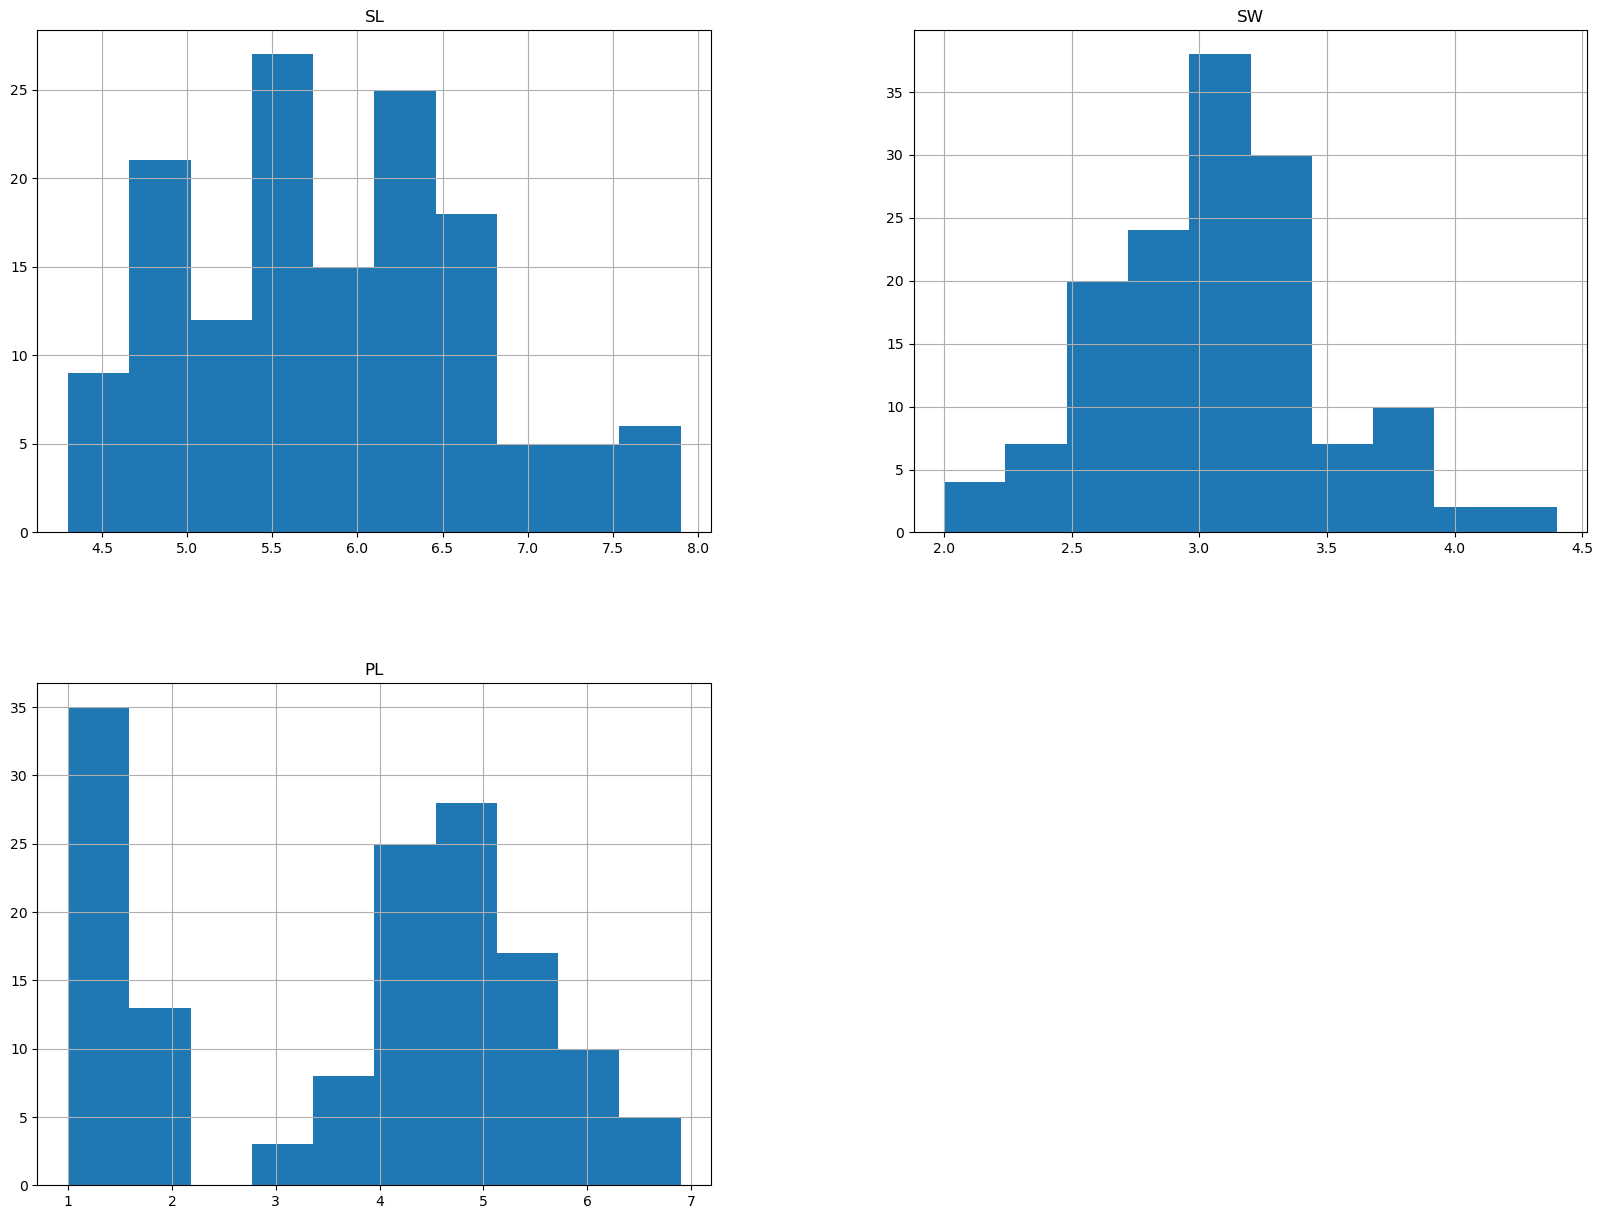

In [10]:
#check for skewness
freqgraph=data[['SL','SW','PL']]
freqgraph.hist(figsize=(20,15))
plt.show()

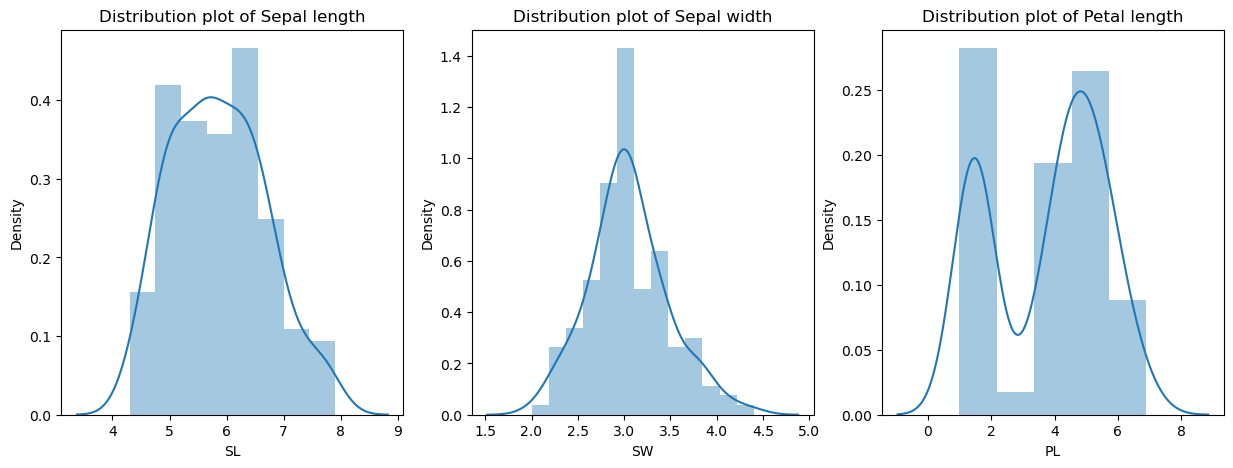

In [11]:
plt.figure(figsize = (15,5))

#distribution plot for Sepal length
plt.subplot(1,3,1)
sns.distplot(data.SL)
plt.title('Distribution plot of Sepal length')

#distribution plot for Sepal width
plt.subplot(1,3,2)
sns.distplot(data.SW)
plt.title('Distribution plot of Sepal width')

#distribution plot for Petal length
plt.subplot(1,3,3)
sns.distplot(data.PL)
plt.title('Distribution plot of Petal length')

plt.show()

We could fill missing values with mean in Sepal length and Sepal width column, and with median in Petal length column.

In [12]:
#filling SL column with the mean
data['SL']=data['SL'].fillna(data['SL'].mean())

#filling SW column with the mean
data['SW']=data['SW'].fillna(data['SW'].mean())

#filling PL column with the median
data['PL']=data['PL'].fillna(data['PL'].median())

In [13]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

All the missing values are filled.

### Handle Outliers-:

In [14]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [15]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

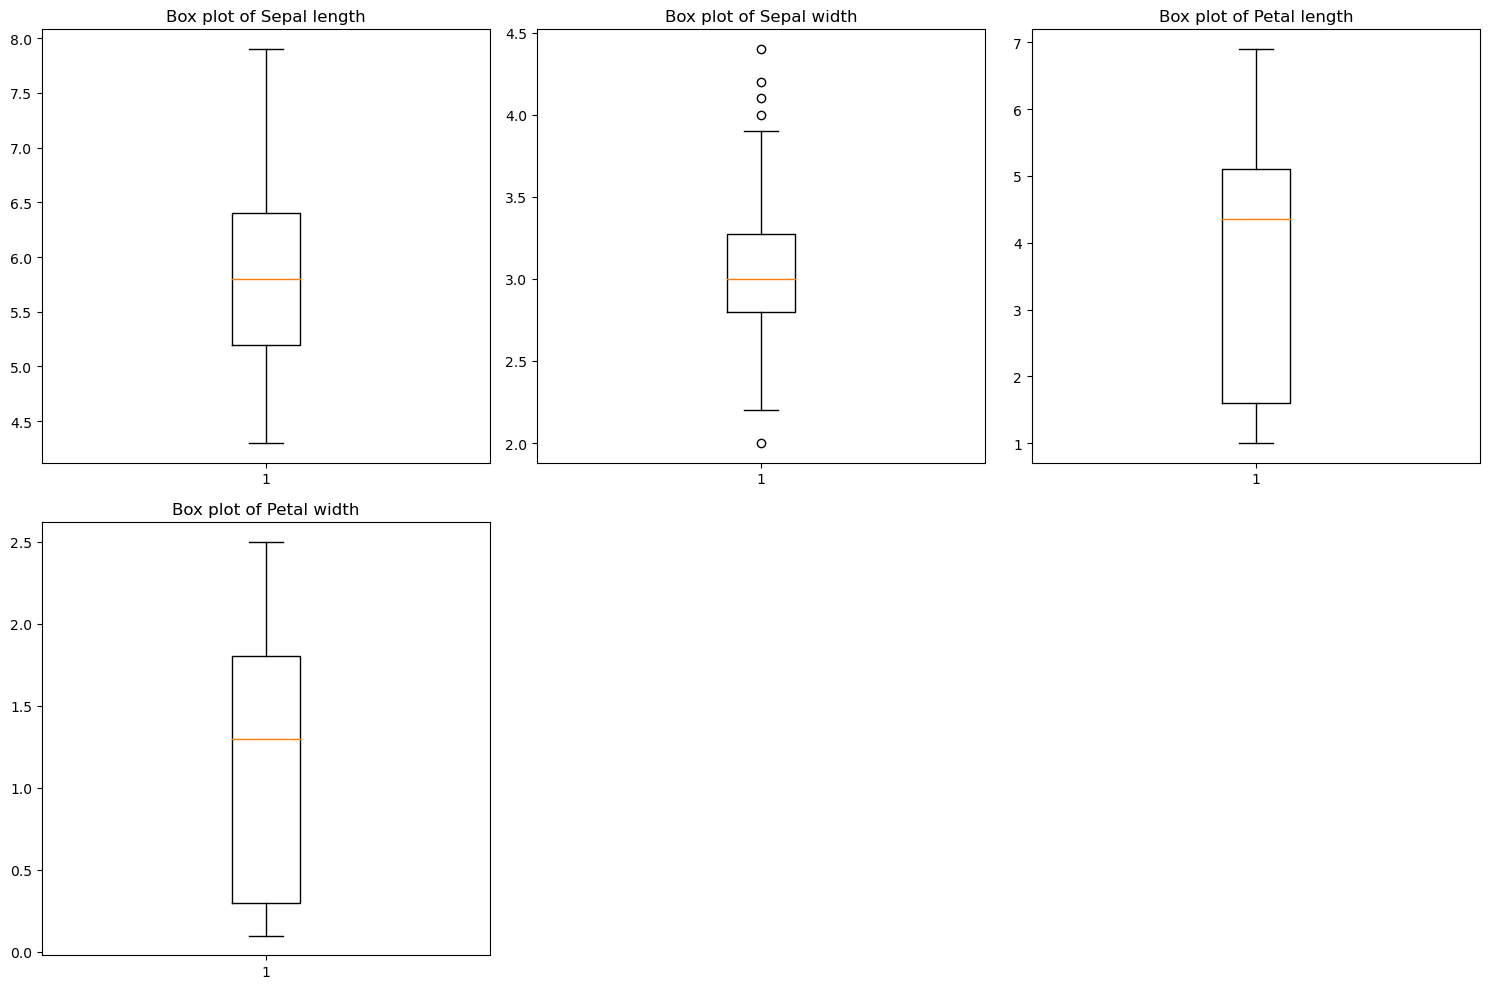

In [21]:
#boxplot for detecting outliers
plt.figure(figsize = (15,10))

#boxplot for SL column
plt.subplot(2,3,1)
plt.boxplot(data['SL'])
plt.title('Box plot of Sepal length')

#boxplot for SW column
plt.subplot(2,3,2)
plt.boxplot(data['SW'])
plt.title('Box plot of Sepal width')

#boxplot for PL column
plt.subplot(2,3,3)
plt.boxplot(data['PL'])
plt.title('Box plot of Petal length')

#boxplot for PW column
plt.subplot(2,3,4)
plt.boxplot(data['PW'])
plt.title('Box plot of Petal width')

plt.tight_layout()
plt.show()

there are outliers in Sepal width column.

In [23]:
#Handle outliers in Sepal width column
Q1 = np.percentile(data['SW'], 25, interpolation='midpoint')
Q2 = np.percentile(data['SW'], 50, interpolation='midpoint')
Q3 = np.percentile(data['SW'], 75, interpolation='midpoint')

#find the interquartile range
IQR = Q3-Q1

#find upper limit and lower limit
low_limit = Q1-1.5*IQR
up_limit = Q3+1.5*IQR

print('Lower limit is :',low_limit)
print('Upper limit is :',up_limit)

Lower limit is : 2.1249999999999996
Upper limit is : 3.9250000000000003


In [24]:
#find the outliers
outlier=[]
for x in data['SW']:
    if((x<low_limit) or (x>up_limit)):
        outlier.append(x)
        
print(outlier)

[4.0, 4.4, 4.1, 4.2, 2.0]


In [27]:
#locate the indexes of outliers

ind2 = (data['SW']<low_limit)|(data['SW']>up_limit)
data.loc[ind2].index

Int64Index([14, 15, 32, 33, 60], dtype='int64')

In [29]:
data.loc[[14,15,32,33,60]]

,SL,SW,PL,PW,Classification
14,5.8,4.0,1.2,0.2,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa
60,5.0,2.0,3.5,1.0,Iris-versicolor


We can impute this column using Quantile capping and flooring.
The data points which are lesser than lower limit(q1-1.5*IQR) are replaced with the lower limit value and the data points which are greater than upper limit(q3+1.5*IQR) are replaced with the upper limit value.